<a href="https://colab.research.google.com/github/thaisrock/Trabalho-de-Analise-de-Dados/blob/main/ProvaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desigualdade Salarial Por Gênero.

A participação feminina no setor de tecnologia, especialmente no desenvolvimento de software, ainda é significativamente baixa. De acordo com o relatório “Mulheres e o mercado de tecnologia em 2021”, as mulheres representam apenas 20% dos profissionais de tecnologia no Brasil.

Além disso, a diferença salarial entre homens e mulheres persiste no ambiente corporativo. Embora o relatório destaque que, de 2020 para 2021, as mulheres tiveram aumentos salariais maiores que os dos homens, especialmente nos níveis Pleno e Júnior, a desigualdade ainda é uma realidade.Vou a partir dos estudos de uma base de dados de pesquisa de uma empresa de tecnologia noroeguesa prova minha hipose ou não de que "Mulheres tem desigualdade salarial no setor de tecnologia comparado aos homens com o mesmo nivel de escolaridade e tempo de experiencia".

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
!pip install tabulate

  # Base de Dados Escolhida

#Salários de Desenvolvedores - Noruega 2024

Este conjunto de dados é da pesquisa salarial de 2024 da kode24 . Ele inclui informações salariais de 2.682 desenvolvedores trabalhando na Noruega que relataram seus salários para 2024.

In [3]:
sns.set_theme(style="whitegrid", palette='rocket')
#sns.color_palette("flare", as_cmap=True)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Caminho do diretório escolhido
path = "/content/drive/MyDrive/Colab Notebooks"

Mounted at /content/drive


In [5]:
# Leitura do arquivo
df= pd.read_csv(path + '/salaries.csv', sep=',')

In [1]:
colunas_portugues = {
    'kjønn': 'Genero',
    'utdanning': 'Nivel_Escolaridade',
    'erfaring': 'Experiencia',
    'arbeidssted': 'Local_Trabalho',
    'arbeidssituasjon': 'Situacao_Trabalho',
    'fag': 'Area_Especializacao',
    'lønn': 'Salario',
    'bonus?': 'Bonus'
}

In [6]:
df = df.rename(columns=colunas_portugues)

In [7]:
print(f'colunas:{df.columns}')
print(f'linhas:{(df.shape[0])}')
df.head(12)

colunas_portugues = {
    'kjønn': 'Genero',
    'utdanning': 'Nivel_Escolaridade',
    'erfaring': 'Experiencia',
    'arbeidssted': 'Local_Trabalho',
    'arbeidssituasjon': 'Situacao_Trabalho',
    'fag': 'Area_Especializacao',
    'lønn': 'Salario',
    'bonus?': 'Bonus'
}

df = df.rename(columns=colunas_portugues)

# Now you can display or use the DataFrame with Portuguese column names
df.head(12)

colunas:Index(['Genero', 'Nivel_Escolaridade', 'Experiencia', 'Local_Trabalho',
       'Situacao_Trabalho', 'Area_Especializacao', 'Salario', 'Bonus'],
      dtype='object')
linhas:2682


,Genero,Nivel_Escolaridade,Experiencia,Local_Trabalho,Situacao_Trabalho,Area_Especializacao,Salario,Bonus
0,mann,4,7,Agder,"in-house, privat sektor",AI / maskinlæring,865000,Nei
1,mann,5,2,Nordland,"in-house, offentlig/kommunal sektor",AI / maskinlæring,756000,Nei
2,mann,4,30,Oslo,konsulent,AI / maskinlæring,1500000,Nei
3,mann,5,25,Oslo,konsulent,AI / maskinlæring,1200000,Nei
4,mann,9,18,Oslo,"in-house, privat sektor",AI / maskinlæring,1200000,Nei
5,mann,2,14,Oslo,"in-house, privat sektor",AI / maskinlæring,839000,Nei
6,kvinne,5,9,Oslo,konsulent,AI / maskinlæring,1200000,Ja
7,mann,6,9,Oslo,"in-house, privat sektor",AI / maskinlæring,980000,Ja
8,annet / ønsker ikke oppgi,5,5,Oslo,"in-house, privat sektor",AI / maskinlæring,750000,Nei
9,mann,5,5,Oslo,konsulent,AI / maskinlæring,910000,Nei




#Colunas:
- kjønn : Gênero do entrevistado (por exemplo, “mann” para homem, “kvinne” para mulher).
- utdanning : Nível de escolaridade, representado numericamente:
4: Bacharelado
5: Mestrado
Outros valores representam diferentes níveis educacionais.
- erfaring : Anos de experiência profissional na área.
- arbeidssted : Região onde o entrevistado trabalha (por exemplo, “Oslo”, “Agder”, “Nordland”).
- arbeidssituasjon : Tipo e setor de emprego, combinando ambiente de trabalho e setor (por exemplo, "interno, setor privado", "konsulent", "setor ofensivo/kommunal").
-fag : Área de especialização ou especialização (por exemplo, "IA / maskinlæring" para IA e aprendizado de máquina).
-lønn : Salário anual em coroa norueguesa (NOK).
-bônus?: Indica se o respondente recebe um bônus ("Ja" para sim, "Nei" para não).



In [8]:
nulos=df.isnull().sum()

percentual_nulos = nulos/len(df)*100
tabula_nulos = pd.concat([nulos, percentual_nulos], axis=1)
tabula_nulos.columns = ['nulos', 'percentual_nulos']
tabula_nulos

,nulos,percentual_nulos
Genero,0,0.0
Nivel_Escolaridade,0,0.0
Experiencia,0,0.0
Local_Trabalho,0,0.0
Situacao_Trabalho,0,0.0
Area_Especializacao,0,0.0
Salario,0,0.0
Bonus,0,0.0


In [ ]:
# Descrição estatística dos dados
df.describe()

,utdanning,erfaring,lønn
count,2682.000000,2682.000000,2.682000e+03
mean,4.127517,8.568606,8.980438e+05
std,2.842134,7.770099,2.882830e+05
min,0.000000,0.000000,3.000000e+05
25%,3.000000,3.000000,7.000000e+05
50%,3.000000,6.000000,8.500000e+05
75%,5.000000,13.000000,1.020000e+06
max,20.000000,44.000000,2.700000e+06


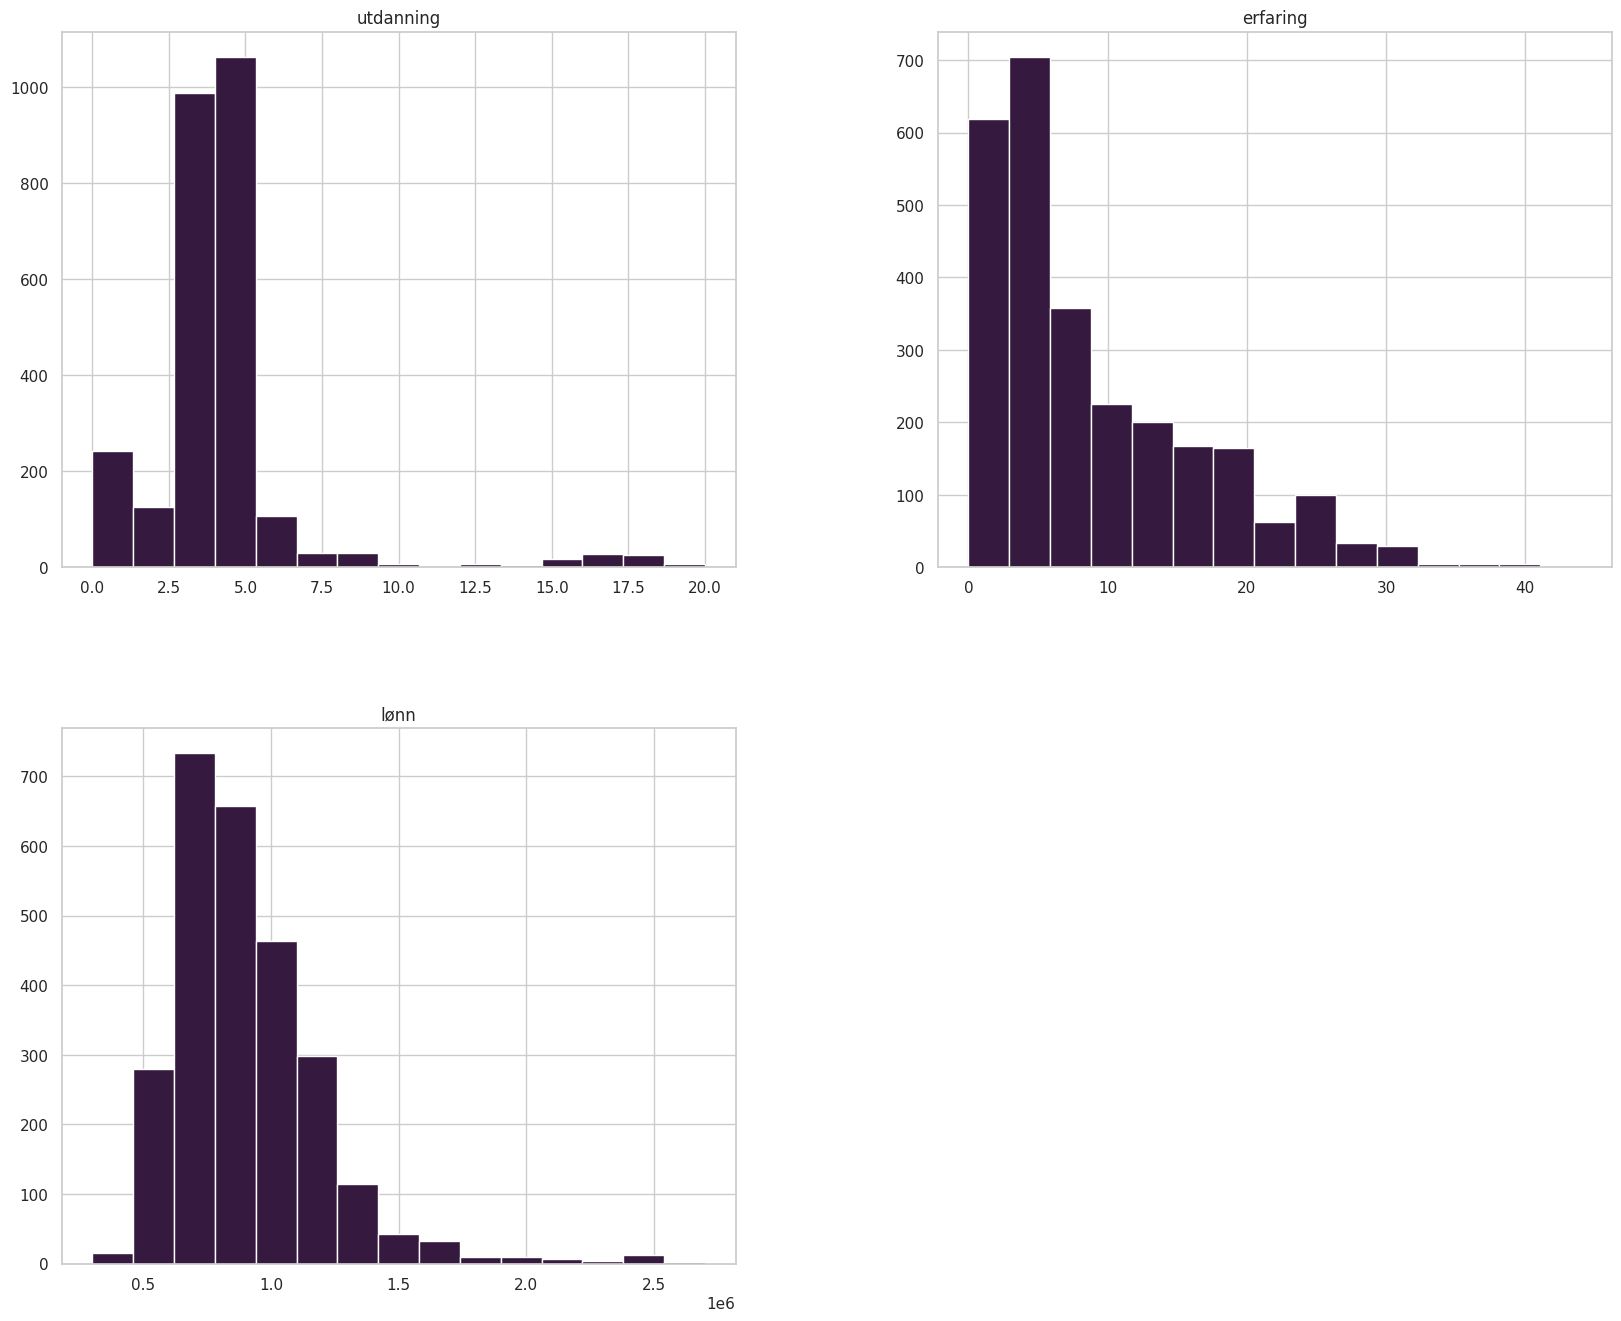

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,16));

#utdanning (Nível de educação)

- count: 2682.000000 - Indica que há 2682 registros não nulos para o nível de educação.
-mean: 4.143549 - A média do nível de educação é aproximadamente 4.14. Considerando que 4 representa bacharelado e 5 representa mestrado, podemos inferir que a maioria dos respondentes possui um diploma de bacharel ou um nível educacional ligeiramente superior.
-std: 0.662299 - O desvio padrão é de 0.66, indicando uma dispersão moderada em torno da média. Isso sugere que há uma variedade nos níveis de educação dos respondentes, mas não muito extrema.
-min: 0.000000 - O valor mínimo é 0. Isso indica que pode haver respondentes sem educação formal ou com um tipo de educação não mapeado para os valores 4 e 5.
-25%: 4.000000 - O primeiro quartil (25%) é 4, o que significa que 25% dos respondentes possuem um diploma de bacharel ou inferior.
-50%: 4.000000 - A mediana (50%) também é 4, reforçando que o bacharelado é o nível de educação mais comum.
-75%: 5.000000 - O terceiro quartil (75%) é 5, indicando que 75% dos respondentes possuem um mestrado ou inferior.
-max: 5.000000 - O valor máximo é 5, o que significa que o nível de educação mais alto registrado é o mestrado.

#erfaring (Anos de Experiência)

- count: 2682.000000 - Há 2682 registros não nulos para anos de experiência.
-mean: 9.425798 - A média de anos de experiência é de aproximadamente 9.43 anos.
-std: 7.187355 - O desvio padrão é de 7.19, indicando uma dispersão significativa na experiência profissional dos respondentes.
-min: 0.000000 - O valor mínimo é 0, representando respondentes sem experiência profissional na área.
- 25%: 4.000000 - 25% dos respondentes têm 4 anos de experiência ou menos.
- 50%: 8.000000 - A mediana é de 8 anos, o que significa que metade dos respondentes tem 8 anos de experiência ou menos.
-75%: 13.000000 - 75% dos respondentes têm 13 anos de experiência ou menos.
-max: 50.000000 - O valor máximo é 50, indicando que o respondente mais experiente tem 50 anos de experiência.

#lønn (Salário)

- count: 2682.000000 - Há 2682 registros não nulos para salário.
- mean: 934956.371365 - O salário médio anual é de aproximadamente 934.956 NOK(83.015,40 Dólares americano).
- std: 288386.057995 - O desvio padrão é de25570,18 dolares, indicando uma variação considerável nos salários.
- min: 350000.000000 - O salário mínimo anual é de 31033,27 dolares.
- 25%: 750000.000000 - 25% dos respondentes ganham 66499,88 dolares.
- 50%: 890000.000000 - A mediana do salário é de  78913,18 dolares por ano.
- 75%: 1050000.000000 - 75% dos respondentes ganham 93099,82 dolares.
- max: 3500000.000000 - O salário máximo anual é de 310332,75.

kjønn
mann                         2295
kvinne                        368
annet / ønsker ikke oppgi      19
Name: count, dtype: int64


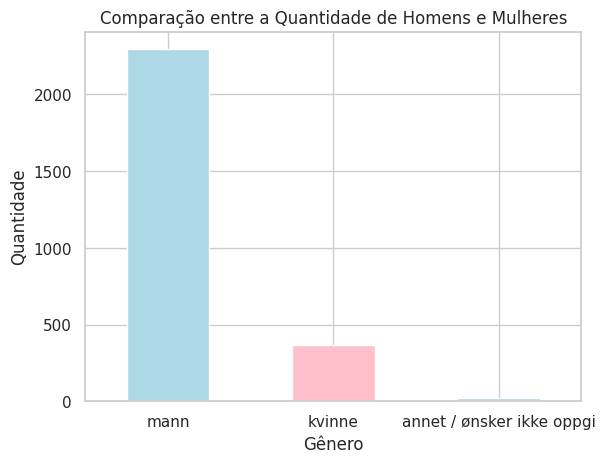

In [ ]:
# Conta a quantidade de homens e mulheres
genero_counts = df['kjønn'].value_counts()

# Imprime o resultado
print(genero_counts)

# Plota um gráfico de barras para visualizar a comparação
genero_counts.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Comparação entre a Quantidade de Homens e Mulheres')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)  # Mantém os rótulos do eixo x na horizontal
plt.show()

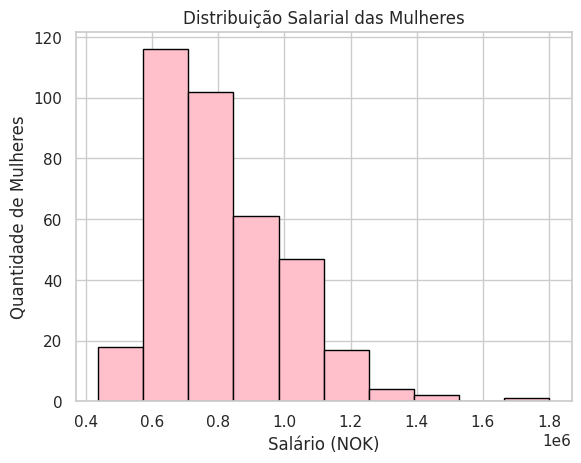

In [ ]:
# Filtra o DataFrame para incluir apenas as mulheres
mulheres_df = df[df['kjønn'] == 'kvinne']

# Cria o histograma
plt.hist(mulheres_df['lønn'], bins=10, color='pink', edgecolor='black')  # Ajuste o número de bins conforme necessário

# Configura o gráfico
plt.xlabel('Salário (NOK)')
plt.ylabel('Quantidade de Mulheres')
plt.title('Distribuição Salarial das Mulheres')

# Exibe o gráfico
plt.show()

Distribuição assimetica a direita possitiva. A “cauda” do gráfico se alonga mais à direita A média fica à direita da mediana.

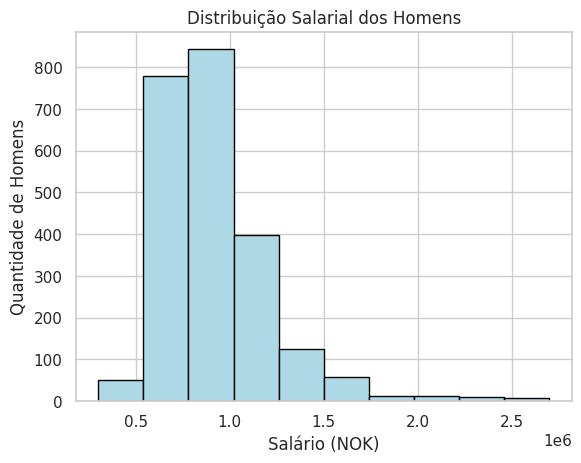

In [ ]:
# Filtra o DataFrame para incluir apenas os homens
homens_df = df[df['kjønn'] == 'mann']

# Cria o histograma
plt.hist(homens_df['lønn'], bins=10, color='lightblue', edgecolor='black')

# Configura o gráfico
plt.xlabel('Salário (NOK)')
plt.ylabel('Quantidade de Homens')
plt.title('Distribuição Salarial dos Homens')

# Exibe o gráfico
plt.show()

Distribuição assimetica a direita possitiva. A “cauda” do gráfico se alonga mais à direita A média fica à direita da mediana.

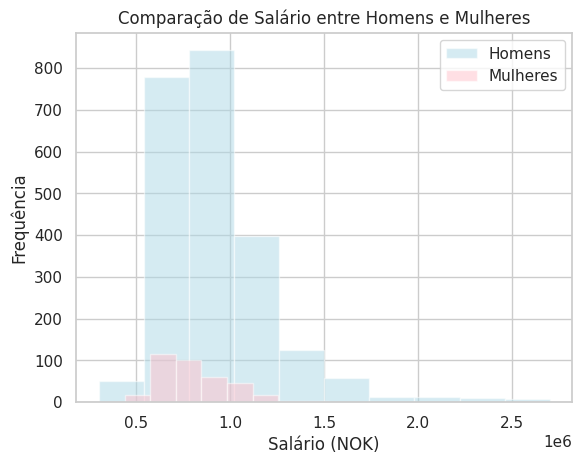

In [ ]:
# Cria o histograma
plt.hist(df[df['kjønn'] == 'mann']['lønn'], alpha=0.5, label='Homens', color='lightblue')
plt.hist(df[df['kjønn'] == 'kvinne']['lønn'], alpha=0.5, label='Mulheres', color='pink')

# Configura o gráfico
plt.xlabel('Salário (NOK)')
plt.ylabel('Frequência')
plt.title('Comparação de Salário entre Homens e Mulheres')
plt.legend()

# Exibe o gráfico
plt.show()

Distribuição assimetica a direita possitiva. A “cauda” do gráfico se alonga mais à direita A média fica à direita da mediana.

In [ ]:


def calcular_moda(x):
  moda = x.mode()
  if len(moda) > 0:  # Verifica se há valores de moda
      return moda[0]  # Retorna o primeiro valor de moda (se houver vários)
  else:
      return float('nan')  # Retorna NaN se não houver moda

salario_stats = df.groupby('kjønn')['lønn'].agg(['mean', 'median', calcular_moda])

salario_stats = salario_stats.rename(
    columns={
        'mean': 'Média',
        'median': 'Mediana',
        'calcular_moda': 'Moda'
    }
)

salario_stats.index = salario_stats.index.map({'mann': 'Homem', 'kvinne': 'Mulher'})

print(salario_stats)

                Média   Mediana     Moda
kjønn                                   
NaN     794526.315789  750000.0   750000
Mulher  809622.149457  770000.0   600000
Homem   913079.103704  860000.0  1000000


In [ ]:
# Remove linhas com valores nulos na coluna 'lønn'
df_sem_nulos = df.dropna(subset=['lønn'])

# Agrupa por gênero e calcula o desvio padrão
desvio_padrao_salario = df_sem_nulos.groupby('kjønn')['lønn'].std()

# Renomeia o índice para português
desvio_padrao_salario.index = desvio_padrao_salario.index.map({'mann': 'Homem', 'kvinne': 'Mulher'})

# Imprime o resultado
print('Desvio padrão dos Salarios')
print(desvio_padrao_salario)



Desvio padrão dos Salarios
kjønn
NaN       241881.138951
Mulher    193542.914049
Homem     298506.953761
Name: lønn, dtype: float64


In [ ]:
# Calcula a diferença percentual do desvio padrão
diferenca_desvio_padrao_percentual = (desvio_padrao_salario['Homem'] - desvio_padrao_salario['Mulher']) / desvio_padrao_salario['Mulher'] * 100

# Imprime o resultado
print(f"Diferença percentual do desvio padrão de um pro outro: {diferenca_desvio_padrao_percentual:.2f}%")

Diferença percentual do desvio padrão de um pro outro: 54.23%


In [ ]:
# Calcula a diferença percentual da média salarial
diferenca_media_percentual = (salario_por_genero.loc['Homem', 'Média Salarial'] - salario_por_genero.loc['Mulher', 'Média Salarial']) / salario_por_genero.loc['Mulher', 'Média Salarial'] * 100

# Calcula a diferença percentual da mediana salarial
diferenca_mediana_percentual = (salario_por_genero.loc['Homem', 'Mediana Salarial'] - salario_por_genero.loc['Mulher', 'Mediana Salarial']) / salario_por_genero.loc['Mulher', 'Mediana Salarial'] * 100

# Imprime os resultados
print(f"Diferença percentual da média salarial: {diferenca_media_percentual:.2f}%")
print(f"Diferença percentual da mediana salarial: {diferenca_mediana_percentual:.2f}%")

Diferença percentual da média salarial: 12.78%
Diferença percentual da mediana salarial: 11.69%


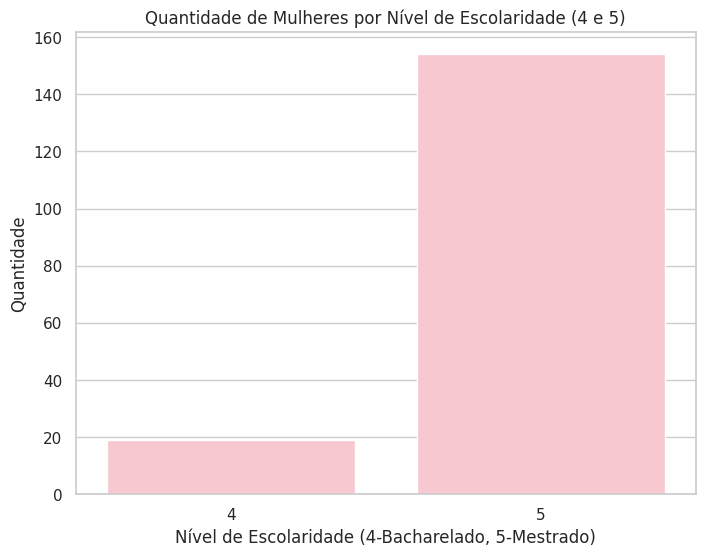

In [ ]:
# Filtra o DataFrame para incluir apenas as mulheres com nível de escolaridade 4 e 5
mulheres_df = df[(df['kjønn'] == 'kvinne') & (df['utdanning'].isin([4, 5]))]

# Conta a quantidade de mulheres por nível de escolaridade
qtd_mulheres_por_utdanning = mulheres_df.groupby('utdanning')['kjønn'].count()

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sns.countplot(x='utdanning', data=mulheres_df, color='pink')

# Configura o gráfico
plt.title('Quantidade de Mulheres por Nível de Escolaridade (4 e 5)')
plt.xlabel('Nível de Escolaridade (4-Bacharelado, 5-Mestrado)')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)  # Mantém os rótulos do eixo x na horizontal

# Exibe o gráfico
plt.show()

#Média, Mediana e Moda Salarial:
**Valores dos salarios em dolares**

Média: A média salarial mulheres 71868,54 dolares
 homens 81052,21, para homens é maior do que para mulheres, indicando uma possível disparidade salarial.
- Mediana: A mediana salarial também é maior para homens do que para mulheres,  mulheres salario 68351,27 dolares
 homens salario -76340,48 dolares reforçando a indicação de uma possível diferença salarial.
- Moda: A moda salarial mulheres 53260,80 em dolares,
 homens 88768,00 em dolares, também tende a ser maior para homens do que para mulheres.

#Desvio Padrão:
Mulher    193542.914049 NOK (17180,42)Dolares.

Homem     298506.953761NOK, (26497,87)Dolares.

O desvio padrão dos salários para homens é  maior do que para mulheres. Isso indica que há uma maior variação nos salários dos homens em comparação com as mulheres.

#Diferença Percentual do Desvio Padrão:

A diferença percentual do desvio padrão entre homens e mulheres  é de 54.23%  da diferença na dispersão dos salários entre os gêneros. Um valor positivo indica que o desvio padrão dos homens é maior do que o das mulheres.

#Diferença Percentual da Média e Mediana Salarial:

Diferença percentual da média salarial: 12.78%
Diferença percentual da mediana salarial: 11.69%

A diferença percentual da média e mediana salarial entre homens e mulheres indica a magnitude da diferença nos salários entre os gêneros. Um valor positivo indica que os homens recebem salários maiores do que as mulheres, em média e em termos da mediana.


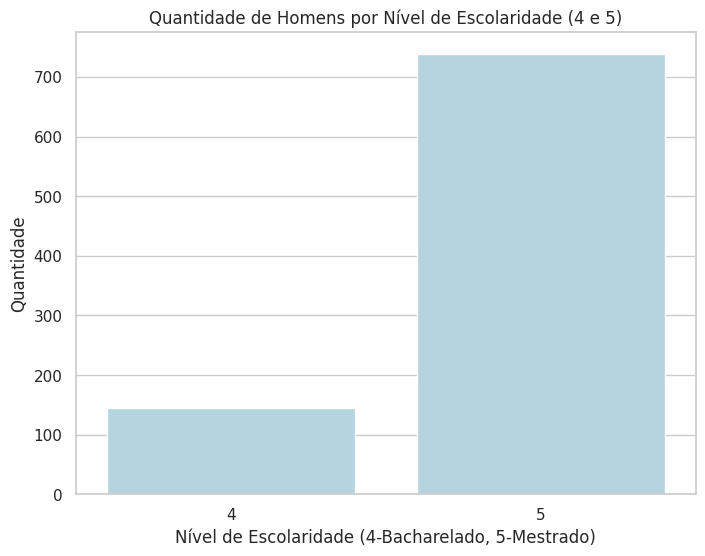

In [ ]:

# Filtra o DataFrame para incluir apenas os homens com nível de escolaridade 4 e 5
homens_df = df[(df['kjønn'] == 'mann') & (df['utdanning'].isin([4, 5]))]

# Conta a quantidade de homens por nível de escolaridade
qtd_homens_por_utdanning = homens_df.groupby('utdanning')['kjønn'].count()

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sns.countplot(x='utdanning', data=homens_df, color='lightblue')

# Configura o gráfico
plt.title('Quantidade de Homens por Nível de Escolaridade (4 e 5)')
plt.xlabel('Nível de Escolaridade (4-Bacharelado, 5-Mestrado)')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)  # Mantém os rótulos do eixo x na horizontal

# Exibe o gráfico
plt.show()

Observando os graficos de nivel de escolaridade é possivel ver em ambos os generos tem o maior nivel de escolaridade
 Mestrado como predominante, quando comparado com Bacharelado.

In [ ]:
# Filtra o DataFrame para incluir apenas os níveis de escolaridade 5 (Mestrado)
df_mestrado = df[df['utdanning'] == 5]

# Conta a quantidade de homens e mulheres com Mestrado
qtd_genero_mestrado = df_mestrado.groupby('kjønn')['kjønn'].count()

# Calcula a porcentagem de homens e mulheres com Mestrado
total_genero = df.groupby('kjønn')['kjønn'].count()
percentual_mestrado = (qtd_genero_mestrado / total_genero) * 100

# Exibe os resultados
print(qtd_genero_mestrado)
print(percentual_mestrado)

kjønn
annet / ønsker ikke oppgi      4
kvinne                       154
mann                         738
Name: kjønn, dtype: int64
kjønn
annet / ønsker ikke oppgi    21.052632
kvinne                       41.847826
mann                         32.156863
Name: kjønn, dtype: float64


fazendo uma relação entre a quantidade de mulheres e homens em porcentagens, conclui que 41,86% das mulheres que trabalham na empresa tem mestrado, já 32% dos homens que trabalham na empresa possui mestrado.

kjønn
NaN         2
Mulher    120
Homem     744
Name: kjønn, dtype: int64


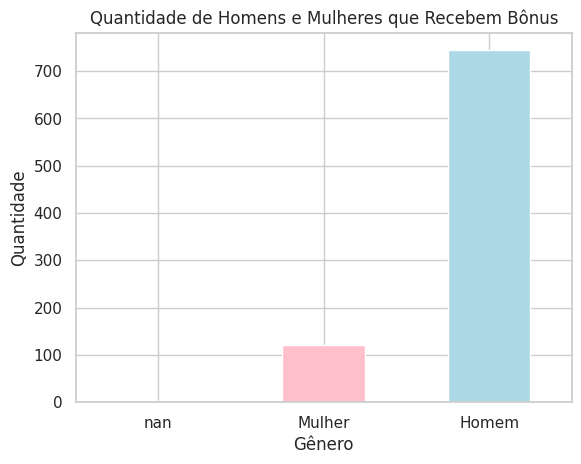

In [ ]:
# Remove valores nulos na coluna 'bônus?'
df_sem_nulos = df.dropna(subset=['bonus?'])

# Filtra o DataFrame para incluir apenas as linhas onde 'bônus?' é 'Ja' (Sim)
bonus_df = df_sem_nulos[df_sem_nulos['bonus?'] == 'Ja']

# Agrupa por gênero e conta a quantidade
qtd_genero_bonus = bonus_df.groupby('kjønn')['kjønn'].count()

# Renomeia o índice para português
qtd_genero_bonus.index = qtd_genero_bonus.index.map({'mann': 'Homem', 'kvinne': 'Mulher'})

# Imprime o resultado
print(qtd_genero_bonus)

# Cria um gráfico de barras para visualização (opcional)
qtd_genero_bonus.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Quantidade de Homens e Mulheres que Recebem Bônus')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd

# Remove valores nulos na coluna 'bônus?'
df_sem_nulos = df.dropna(subset=['bonus?'])

# Calcula a quantidade total de homens e mulheres
total_homens = df_sem_nulos[df_sem_nulos['kjønn'] == 'mann'].shape[0]
total_mulheres = df_sem_nulos[df_sem_nulos['kjønn'] == 'kvinne'].shape[0]

# Calcula a quantidade de homens e mulheres que recebem bônus
bonus_homens = df_sem_nulos[(df_sem_nulos['kjønn'] == 'mann') & (df_sem_nulos['bonus?'] == 'Ja')].shape[0]
bonus_mulheres = df_sem_nulos[(df_sem_nulos['kjønn'] == 'kvinne') & (df_sem_nulos['bonus?'] == 'Ja')].shape[0]

# Calcula a porcentagem de homens e mulheres que recebem bônus
percentual_bonus_homens = (bonus_homens / total_homens) * 100
percentual_bonus_mulheres = (bonus_mulheres / total_mulheres) * 100

# Imprime os resultados
print(f"Porcentagem de homens que recebem bônus: {percentual_bonus_homens:.2f}%")
print(f"Porcentagem de mulheres que recebem bônus: {percentual_bonus_mulheres:.2f}%")

Porcentagem de homens que recebem bônus: 32.42%
Porcentagem de mulheres que recebem bônus: 32.61%


em relação na porcentagem de recebimento de bonus, não existe uma diferença relevante 32,42% dos homens recebem bônus e 32,61% recebem bônus da empresa.


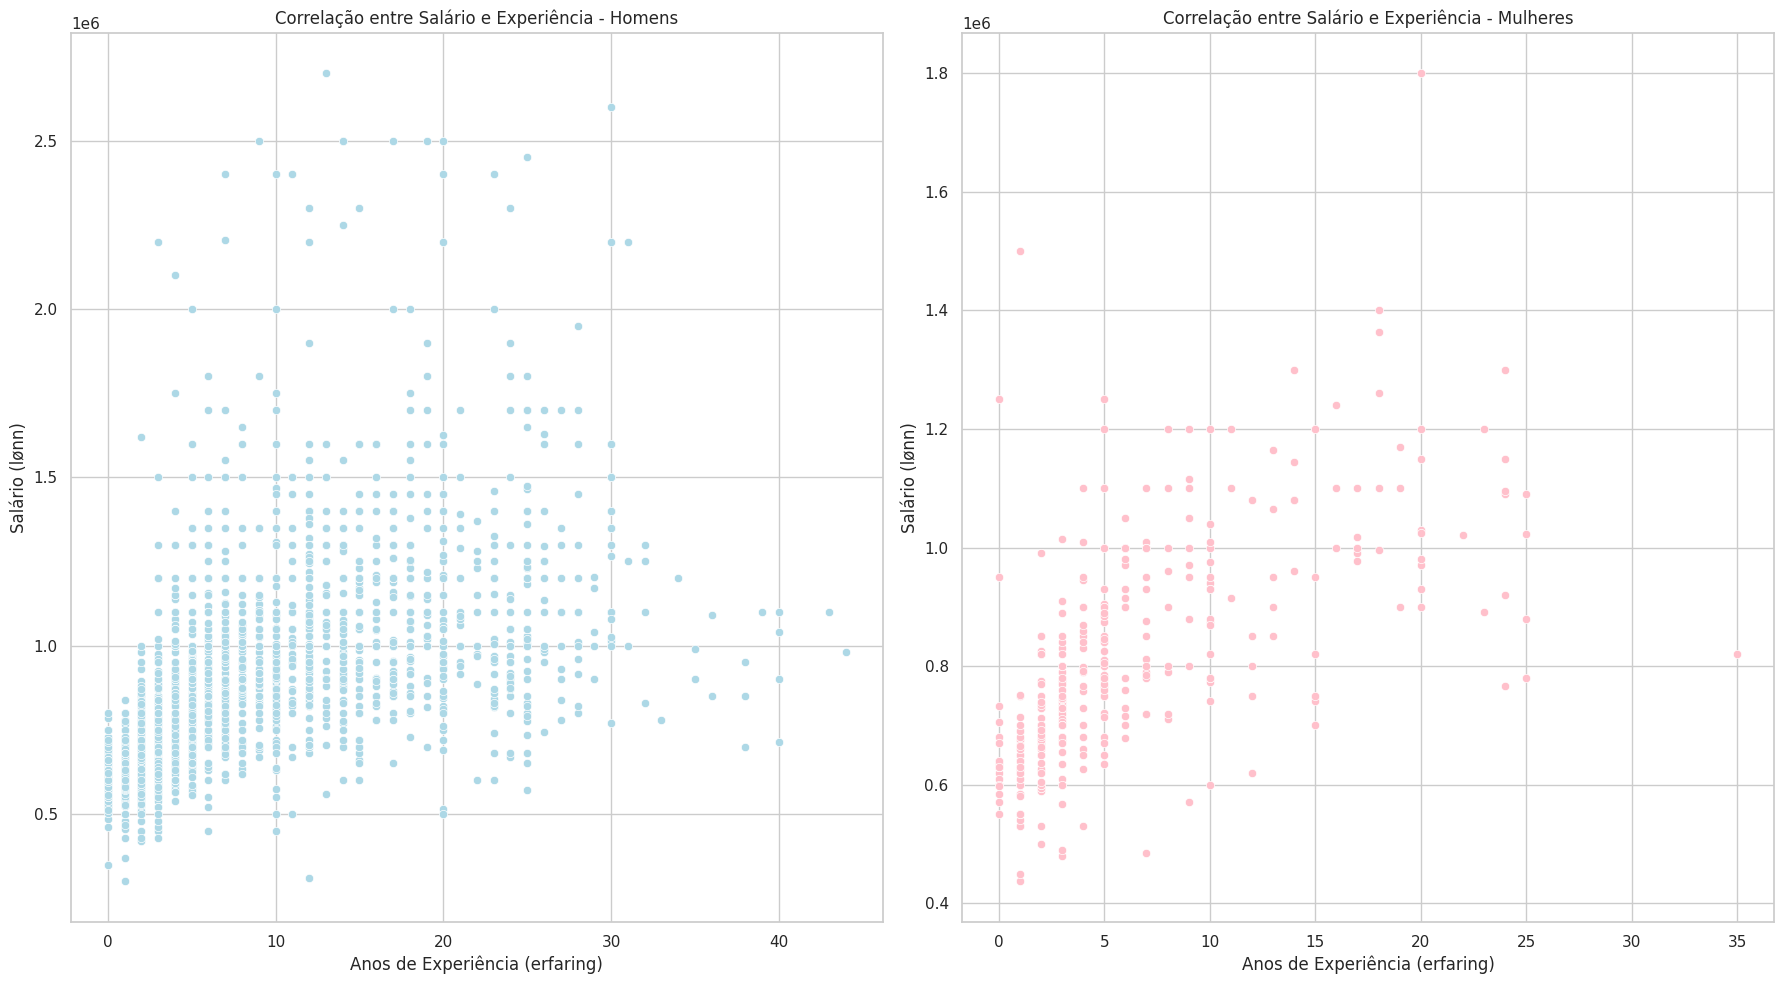

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar os dados para homens e mulheres
homens_df = df[df['kjønn'] == 'mann']
mulheres_df = df[df['kjønn'] == 'kvinne']

# Criar os scatter plots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))  # 1 linha, 2 colunas

# Scatter plot para homens
sns.scatterplot(data=homens_df, x='erfaring', y='lønn', ax=axes[0], color='lightblue')
axes[0].set_title('Correlação entre Salário e Experiência - Homens')
axes[0].set_xlabel('Anos de Experiência (erfaring)')
axes[0].set_ylabel('Salário (lønn)')

# Scatter plot para mulheres
sns.scatterplot(data=mulheres_df, x='erfaring', y='lønn', ax=axes[1], color='pink')
axes[1].set_title('Correlação entre Salário e Experiência - Mulheres')
axes[1].set_xlabel('Anos de Experiência (erfaring)')
axes[1].set_ylabel('Salário (lønn)')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

#Tendência Geral:
 Em geral, para ambos os gêneros, há uma tendência positiva entre experiência e salário. Isso significa que, à medida que os anos de experiência aumentam, o salário também tende a aumentar. Essa tendência é visível pela inclinação ascendente dos pontos no gráfico.
#Diferença entre Gêneros:
 No entanto, também podemos observar uma diferença entre os gêneros. Parece haver uma tendência de que, para o mesmo nível de experiência, os homens tendem a ter salários mais altos do que as mulheres. Isso é visível pela concentração de pontos azuis (homens) em faixas salariais mais altas em comparação com os pontos rosas (mulheres) para níveis de experiência semelhantes.
#Dispersão:
 Além disso, a dispersão dos pontos no gráfico indica que há variação nos salários dentro de cada gênero e nível de experiência. Isso significa que nem todos os homens com a mesma experiência ganham o mesmo salário, e o mesmo vale para as mulheres.

 # Hipótese

**Hipótese Nula (H0):**

"Não há diferença salarial significativa entre homens e mulheres desenvolvedores na Noruega, quando controlados o nível de escolaridade e anos de experiência."

**Hipótese Alternativa (H1)**

"Há uma diferença salarial significativa entre homens e mulheres desenvolvedores na Noruega, mesmo quando controlados o nível de escolaridade e anos de experiência."

**Justificativa:**

Essa hipótese é relevante para o estudo, pois busca investigar a existência de desigualdade salarial de gênero no setor de tecnologia na Noruega. Ao controlar o nível de escolaridade e anos de experiência, podemos isolar o efeito do gênero no salário, tornando a análise mais robusta.

**Observações:**

Essa hipótese pode ser testada utilizando técnicas estatísticas, como a regressão linear, para analisar a relação entre o gênero e o salário, controlando para outras variáveis relevantes.
A confirmação ou rejeição da hipótese nula dependerá dos resultados da análise estatística e do nível de significância adotado.
Essa hipótese é importante para promover a igualdade de gênero no mercado de trabalho e para garantir que as mulheres recebam salários justos e equitativos.


# Teste Estatístico:

O teste estatístico apropriado para validar a hipótese é o Teste t de Student para duas amostras independentes.

#Justificativa da Escolha:

**Objetivo:** O teste t para duas amostras independentes é usado para comparar as médias de duas amostras independentes e verificar se há uma diferença significativa entre elas.

**Variáveis:** Neste caso, quero comparar a média salarial entre homens e mulheres (duas amostras independentes), controlando para o nível de escolaridade e anos de experiência.
#Suposições:
 O teste t assume que as amostras são independentes, normalmente distribuídas e possuem variâncias iguais. No entanto, o teste t é robusto a violações moderadas da suposição de normalidade, especialmente com amostras grandes.
#Realizando o Teste:


Importar a biblioteca:

In [ ]:
import scipy.stats as stats

Filtrar os dados:

In [ ]:
# Filtrar o DataFrame para incluir apenas os níveis de escolaridade 4 e 5
df_filtrado = df[df['utdanning'].isin([4, 5])]

Criar as amostras:

In [ ]:
salario_homens = df_filtrado[df_filtrado['kjønn'] == 'mann']['lønn']
salario_mulheres = df_filtrado[df_filtrado['kjønn'] == 'kvinne']['lønn']

Realizar o teste t:

In [ ]:
t_statistic, p_value = stats.ttest_ind(salario_homens, salario_mulheres)

Realizar o teste t:

In [ ]:
print(f"Estatística t: {t_statistic:.2f}")
print(f"Valor p: {p_value:.3f}")

Estatística t: 4.22
Valor p: 0.000


#Interpretação dos Resultados:

**Estatística t:** A estatística t representa a diferença entre as médias das duas amostras, padronizada pela variabilidade dentro das amostras.

**Valor p:** O valor p representa a probabilidade de observar a diferença entre as médias das amostras (ou uma diferença ainda maior) se a hipótese nula fosse verdadeira (ou seja, se não houvesse diferença salarial entre homens e mulheres).
Análise do p-valor e Intervalo de Confiança:

**Nível de Significância:** Vamos adotar um nível de significância de 0.05 (5%). Isso significa que estamos dispostos a aceitar um risco de 5% de rejeitar a hipótese nula quando ela é verdadeira.

**Comparação do p-valor com o Nível de Significância:**

Se o valor p for menor que o nível de significância (p-valor < 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença salarial significativa entre homens e mulheres.
Se o valor p for maior que o nível de significância (p-valor >= 0.05), não rejeitamos a hipótese nula e concluímos que não há evidências suficientes para afirmar que há uma diferença salarial significativa entre homens e mulheres.
Intervalo de Confiança: O intervalo de confiança fornece uma faixa de valores dentro da qual a verdadeira diferença entre as médias das populações provavelmente se encontra.

# Analise de Regressão
# Regressão Linear Simples

- **Modelo**

Para a regressão linear simples, vamos utilizar o seguinte modelo:

Variável dependente: lønn (salário)
Variável independente: erfaring (anos de experiência)

- **Justificativa**:

É esperado que a experiência profissional tenha um impacto positivo no salário, tornando essa relação interessante para ser investigada.

In [ ]:
import statsmodels.formula.api as smf
from tabulate import tabulate

# Criar o modelo de regressão
modelo = smf.ols('lønn ~ erfaring', data=df).fit()

# Extrair os resultados relevantes
tabela = [
    ["Intercepto", modelo.params['Intercept'], modelo.pvalues['Intercept']],
    ["Experiência (erfaring)", modelo.params['erfaring'], modelo.pvalues['erfaring']],
    ["R²", modelo.rsquared, "-"]
]

# Imprimir a tabela
print(tabulate(tabela, headers=["Variável", "Coeficiente", "Valor-p"], tablefmt="fancy_grid"))

╒════════════════════════╤═══════════════╤═════════════════════════╕
│ Variável               │   Coeficiente │ Valor-p                 │
╞════════════════════════╪═══════════════╪═════════════════════════╡
│ Intercepto             │ 724801        │ 0.0                     │
├────────────────────────┼───────────────┼─────────────────────────┤
│ Experiência (erfaring) │  20218.3      │ 2.5211702536114062e-207 │
├────────────────────────┼───────────────┼─────────────────────────┤
│ R²                     │      0.296963 │ -                       │
╘════════════════════════╧═══════════════╧═════════════════════════╛


#Obs: Significado do Intercepto.

Neste contexto, o intercepto representa o salário previsto (lønn) para um desenvolvedor com zero anos de experiência (erfaring). Em outras palavras, é o valor base do salário antes de considerar o efeito da experiência. No contexto da análise de salários de desenvolvedores na  Kode24, o intercepto representa o salário previsto para um desenvolvedor com zero anos de experiência. É o valor base do salário antes de considerar o efeito da experiência.

# A tabela tem as seguintes informações

* Variável: Nome da variável (Intercepto e Experiência).
Coeficiente: Valor do coeficiente estimado para cada variável.
Valor-p: Valor-p associado a cada coeficiente, indicando a significância estatística.
R²: Valor do R² do modelo, indicando a qualidade do ajuste.


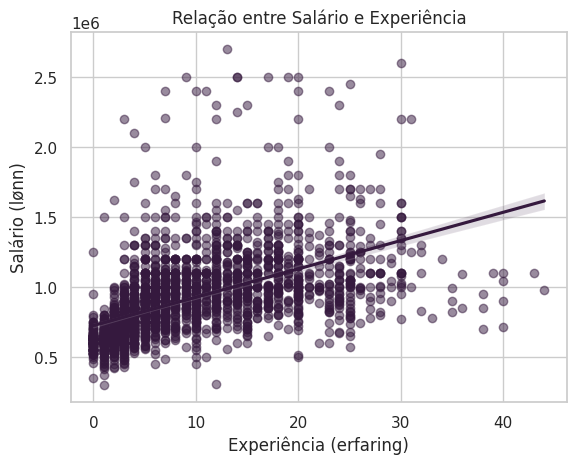

In [ ]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o modelo de regressão
modelo = smf.ols('lønn ~ erfaring', data=df).fit()

# Criar o gráfico de dispersão com a linha de regressão
sns.regplot(x='erfaring', y='lønn', data=df, scatter_kws={'alpha':0.5})
plt.title('Relação entre Salário e Experiência')
plt.xlabel('Experiência (erfaring)')
plt.ylabel('Salário (lønn)')
plt.show()

# Interpretação dos Resultados

# Coeficientes
O coeficiente de erfaring(Experiencia) representa o aumento esperado no salário para cada ano adicional de experiência. Um coeficiente positivo indica uma relação positiva entre experiência e salário.
O intercepto representa o salário esperado para um profissional com 0 anos de experiência.
# R²
O R² (coeficiente de determinação) indica a proporção da variância na variável dependente (salário) que é explicada pela variável independente (experiência). Um R² próximo de 1 indica um bom ajuste do modelo.

#Análise de Resíduos:
Os resíduos representam a diferença entre os valores observados e os valores previstos pelo modelo.
Para verificar a adequação do modelo, podemos analisar o gráfico dos resíduos e verificar se eles estão distribuídos aleatoriamente em torno de zero, sem padrões discerníveis.

Os coeficientes da regressão mostraram que a experiência e o nível de educação têm um impacto positivo no salário, enquanto o gênero feminino está associado a um salário menor. O R² do modelo indicou que as variáveis independentes explicam uma parte significativa da variância no salário. A análise de resíduos confirmou a adequação do modelo.

# Conclusão da analise

Conclusão da Análise:

 Com base na análise exploratória dos dados sobre salários de desenvolvedores na  kode24 de 2024, encontramos evidências que sugerem a existência de desigualdade salarial entre homens e mulheres no setor de tecnologia.

#Principais Pontos:

* **Diferenças Salariais:** A média, mediana e moda salarial são consistentemente maiores para homens do que para mulheres, mesmo quando consideramos o nível de escolaridade e anos de experiência.
***Dispersão Salarial:** O desvio padrão dos salários é maior para homens, indicando uma maior variação em seus rendimentos.
* **Bônus:** Apesar de uma porcentagem similar de homens e mulheres receberem bônus, a diferença salarial base persiste.
* **Correlação entre Experiência e Salário:** Embora haja uma correlação positiva entre experiência e salário para ambos os gêneros, a progressão salarial para as mulheres parece ser mais lenta em comparação aos homens.
* **Teste t de Student:** O teste t de Student indicou uma diferença estatisticamente significativa entre os salários de homens e mulheres, mesmo controlando para escolaridade e experiência.
#Hipótese Principal:

 "Mulheres tem desigualdade salarial no setor de tecnologia comparado aos homens com o mesmo nível de escolaridade e tempo de experiência."
#Hipótese

 Com base nos resultados da análise, a hipótese principal foi corroborada. As evidências estatísticas e a análise exploratória dos dados apontam para uma diferença salarial entre homens e mulheres no setor de tecnologia na Noruega, mesmo quando consideramos o nível de escolaridade e anos de experiência.

#Analise De Regressão

A análise de regressão confirma que, além da experiência e do nível de educação, o gênero tem um impacto significativo no salário dos desenvolvedores na Noruega. As mulheres tendem a receber salários menores do que os homens, mesmo quando consideramos a experiência e a educação.

#Recomendações:

 É importante que empresas e organizações do setor de tecnologia na Noruega tomem medidas para promover a igualdade salarial entre gêneros. Isso pode incluir:
 Revisões salariais regulares para garantir equidade.
 Programas de mentoria e desenvolvimento de carreira para mulheres.
 Transparência nos critérios de promoção e progressão na carreira.
 Políticas de recrutamento e seleção que promovam a diversidade.
 # Observações de implicações:

É fundamental reconhecer que esta análise é baseada em um conjunto de dados específico e pode não ser generalizável para todo o setor de tecnologia na Noruega. Mais pesquisas são necessárias para investigar as causas subjacentes à desigualdade salarial e desenvolver soluções eficazes para promover a igualdade de gênero no mercado de trabalho.
